### importing the libraries ###

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### importing the dataset ###

In [354]:
df = pd.read_csv('insurance1.csv')
print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### EDA(EXPLORATORY DATA ANALYSIS TO KNOW WETHER THE DATA HAS ANY KIND OF OUTLIERS OR MISSING VALUES ###

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [226]:
df.shape

(1338, 7)

### to find if there is any missing vaue ###

In [227]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### to find if the frequency counts ###

In [228]:
print('frequency count for sex')
print(df["sex"].value_counts())
print('frequency count for smoker')
print(df["smoker"].value_counts())
print('frequency count for region')
print(df["region"].value_counts())

frequency count for sex
male      676
female    662
Name: sex, dtype: int64
frequency count for smoker
no     1064
yes     274
Name: smoker, dtype: int64
frequency count for region
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


### to find the outliers ###

In [229]:
pip install seaborn

You should consider upgrading via the '/home/red/my_project_dir/my_project_env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [230]:
sort_data=np.sort(df["age"])
print(sort_data)

[18 18 18 ... 64 64 64]


In [231]:
q1=np.percentile(df["age"],25,interpolation='midpoint')
q2=np.percentile(df["age"],50,interpolation='midpoint')
q3=np.percentile(df["age"],75,interpolation='midpoint')
print('q1 25 percentile of the given data is',q1)
print('q2 50 percentile of the given data is',q2)
print('q3 75 percentile of the given data is',q3)
IQR=q3-q1
print("inter quartile range is",IQR)

q1 25 percentile of the given data is 27.0
q2 50 percentile of the given data is 39.0
q3 75 percentile of the given data is 51.0
inter quartile range is 24.0


In [232]:
low_limit=q1-1.5*IQR
up_limit=q3+1.5*IQR
print("low_limit",low_limit)
print("up_limit",up_limit)

low_limit -9.0
up_limit 87.0


In [233]:
outlier=[]
for x in df["age"]:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)
print("outlier in the age column is",outlier)

outlier in the age column is []


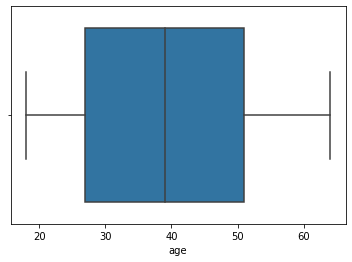

In [234]:
sns.boxplot(df["age"])

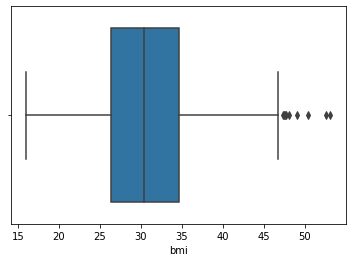

In [236]:
sns.boxplot(df["bmi"])

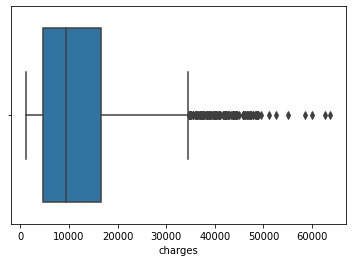

In [238]:
sns.boxplot(df["charges"])

### plotting the correlation matrix ###

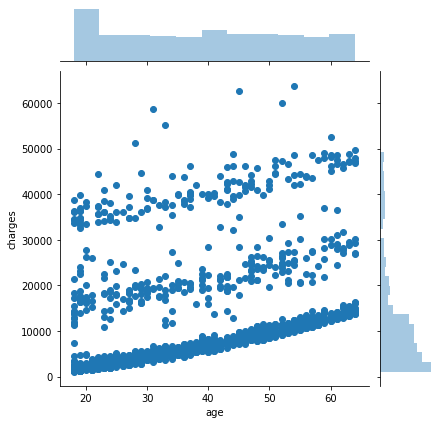

In [240]:
sns.jointplot(x=df['age'],y=df['charges'])


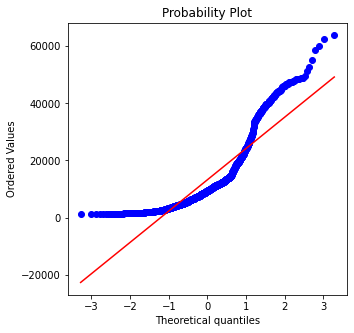

In [309]:
from scipy import stats
fig=plt.figure(figsize=(5,5))
res=stats.probplot(df['charges'],plot=plt)

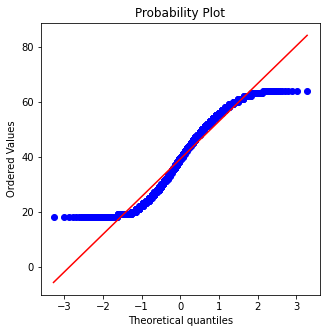

In [310]:
from scipy import stats
fig=plt.figure(figsize=(5,5))
res=stats.probplot(df['age'],plot=plt)

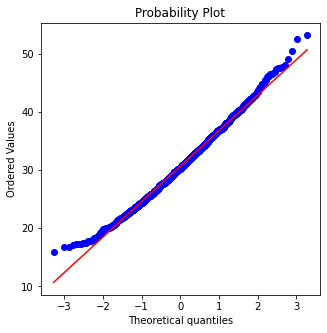

In [311]:
from scipy import stats
fig=plt.figure(figsize=(5,5))
res=stats.probplot(df['bmi'],plot=plt)

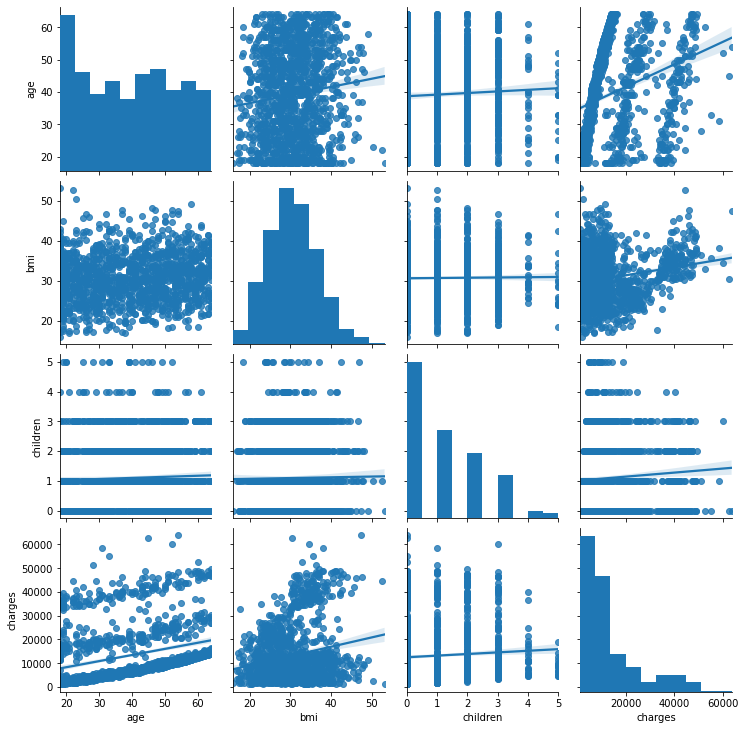

In [312]:
sns.pairplot(df,kind='reg')

### we can see that as age increases charges also increases ###

In [ ]:
df["sex"]=df["sex"].apply({'male':0,'female':1}.get)
df["smoker"]=df["smoker"].apply({'yes':0,'no':1}.get)
#df['region']=df['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)
print(df)

In [252]:
df['region']=df['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       2   1725.55230
2      28    0  33.000         3       1       2   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       4   2205.98080
1335   18    1  36.850         0       1       2   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


In [253]:
print(x)

[[0.0 0.0 0.0 ... 19 27.9 0]
 [0.0 0.0 1.0 ... 18 33.77 1]
 [0.0 0.0 1.0 ... 28 33.0 3]
 ...
 [0.0 0.0 1.0 ... 18 36.85 0]
 [0.0 0.0 0.0 ... 21 25.8 0]
 [0.0 1.0 0.0 ... 61 29.07 0]]


### correlation between smoker and charges

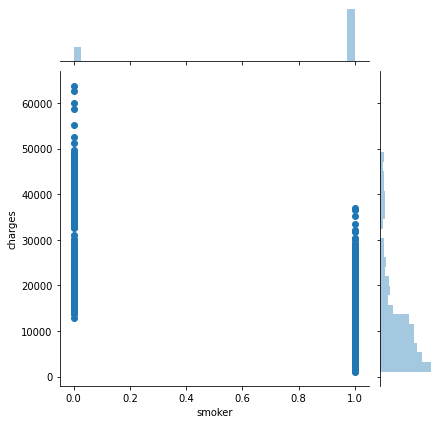

In [254]:
sns.jointplot(x=df["smoker"],y=df["charges"])

### we can clearly see that cost for smokers are increasing ###

### data preprocessing ###

### onehotencoding ###

In [355]:
x = df.iloc[:,:-1].values # values function is used to extract only values from the datafram and store them as ndarray
y = df.iloc[:,-1].values
print(x)
print(y)
print(x[0])

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
[19 'female' 27.9 0 'yes' 'southwest']


In [356]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder(),[1])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)


[[1.0 0.0 19 ... 0 'yes' 'southwest']
 [0.0 1.0 18 ... 1 'no' 'southeast']
 [0.0 1.0 28 ... 3 'no' 'southeast']
 ...
 [1.0 0.0 18 ... 0 'no' 'southeast']
 [1.0 0.0 21 ... 0 'no' 'southwest']
 [1.0 0.0 61 ... 0 'yes' 'northwest']]


In [357]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder(),[5])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 1.0 1.0 ... 27.9 0 'southwest']
 [1.0 0.0 0.0 ... 33.77 1 'southeast']
 [1.0 0.0 0.0 ... 33.0 3 'southeast']
 ...
 [1.0 0.0 1.0 ... 36.85 0 'southeast']
 [1.0 0.0 1.0 ... 25.8 0 'southwest']
 [0.0 1.0 1.0 ... 29.07 0 'northwest']]


In [358]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder(),[7])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 0.0 ... 19 27.9 0]
 [0.0 0.0 1.0 ... 18 33.77 1]
 [0.0 0.0 1.0 ... 28 33.0 3]
 ...
 [0.0 0.0 1.0 ... 18 36.85 0]
 [0.0 0.0 0.0 ... 21 25.8 0]
 [0.0 1.0 0.0 ... 61 29.07 0]]


In [248]:
print(x)

[[0.0 0.0 0.0 ... 19 27.9 0]
 [0.0 0.0 1.0 ... 18 33.77 1]
 [0.0 0.0 1.0 ... 28 33.0 3]
 ...
 [0.0 0.0 1.0 ... 18 36.85 0]
 [0.0 0.0 0.0 ... 21 25.8 0]
 [0.0 1.0 0.0 ... 61 29.07 0]]


### since it was found that more outliers are present in the bmi if we drop it more information will be lost and random forest handles overfitting by binning ###

### feature scaling ###

In [359]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[-0.56526686 -0.56641788 -0.61132367 ... -1.43876426 -0.45332
  -0.90861367]
 [-0.56526686 -0.56641788  1.63579466 ... -1.50996545  0.5096211
  -0.07876719]
 [-0.56526686 -0.56641788  1.63579466 ... -0.79795355  0.38330685
   1.58092576]
 ...
 [-0.56526686 -0.56641788  1.63579466 ... -1.50996545  1.0148781
  -0.90861367]
 [-0.56526686 -0.56641788 -0.61132367 ... -1.29636188 -0.79781341
  -0.90861367]
 [-0.56526686  1.76548098 -0.61132367 ...  1.55168573 -0.26138796
  -0.90861367]]


### DATA SUMMARY ###

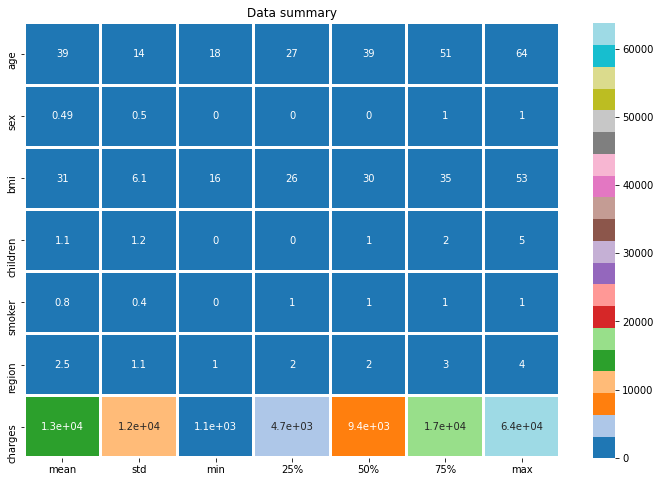

In [257]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor="w",linewidth=2,cmap=sns.color_palette("tab20"))
plt.title("Data summary")
plt.show()

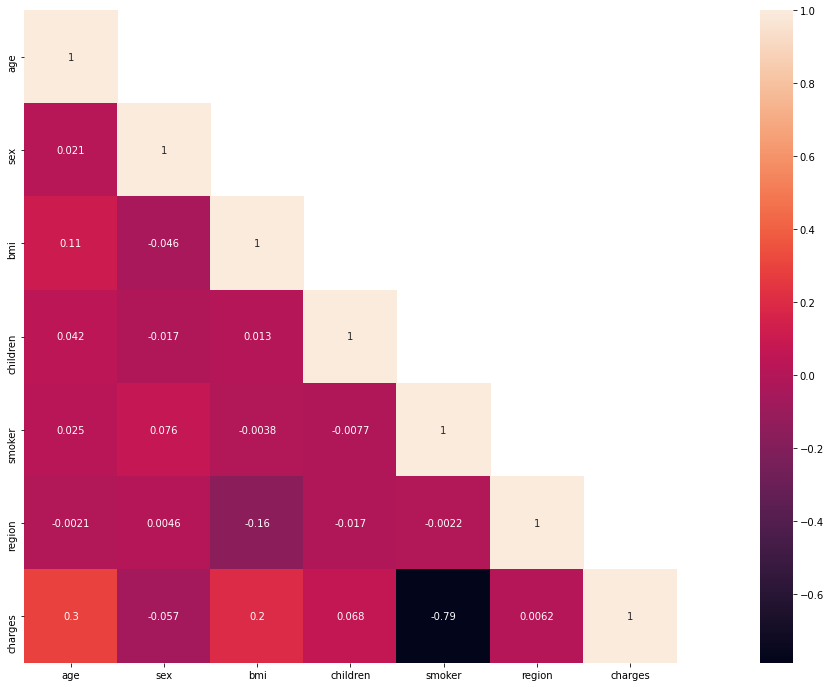

In [258]:
cor_mat=df[:].corr()
mask=np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### To find the percentage of spokers and non spokers ###

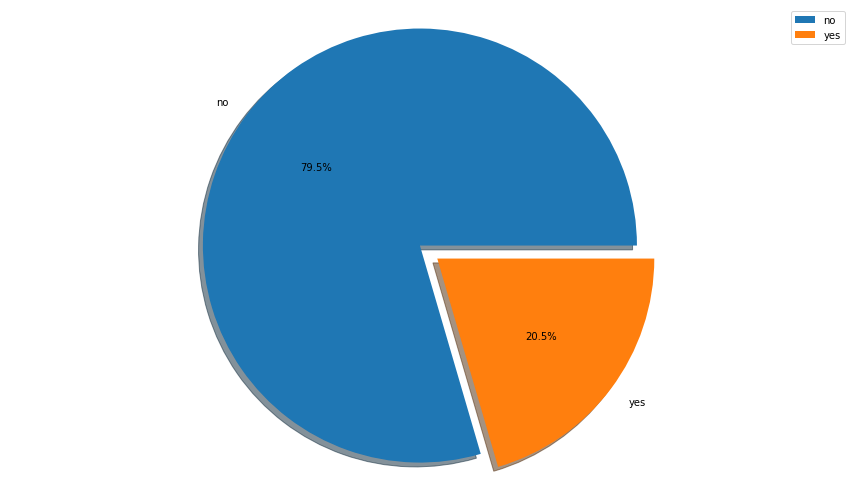

In [261]:
explode=(0.1,0)
fig1,axl=plt.subplots(figsize=(12,7))
axl.pie(df['smoker'].value_counts(),explode=explode,labels=['no','yes'],autopct='%1.1f%%',shadow=True)
axl.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

### To find the number of men and women ###

Female: 676
Male: 662


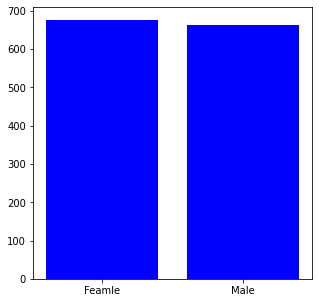

In [262]:
plt.figure(figsize=(5,5))
print('Female:',len(df[df.sex==0]))
print('Male:',len(df[df.sex==1]))
y=len(df[df.sex==0]),len(df[df.sex==1])
x=['Feamle','Male']
plt.bar(x,y,color='blue')
plt.show()

### distribution of charges by region ###

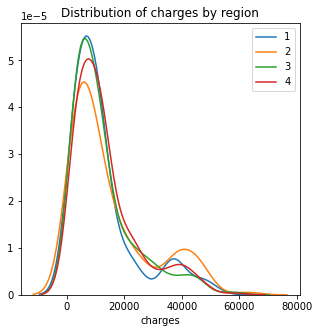

In [264]:
plt.figure(figsize=(5,5))
plt.title("Distribution of charges by region")
for i in df['region'].unique():
    sns.distplot(df[(df['region']==i)]['charges'],hist=False,kde=True,label=i)

### splitting into training and test set ###

In [360]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,ParameterGrid,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

### training the model ###

### for n_estimator value we use a random value 100 ###

In [361]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100,random_state=20)
rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=20)

In [362]:
y_pred= rfr.predict(x_test)
from sklearn.metrics import r2_score
print("test score",round(r2_score(y_test,y_pred),2))

test score 0.88


### as we know the more number of trees better are the results but to know what are the values that would be very optimal , going to do hyperparameter tuning using RandomSearchCv  and thereby accuracy will also increase###

In [283]:
random_grid={'bootstrap':[True,False],
             'max_depth':[15,100,200,300,400,500],
             'max_features':['auto','sqrt'],
             'min_samples_leaf':[1,2,4],
             'min_samples_split':[2,5,10],
             'n_estimators':[130,200,300,400,500]
            }

In [284]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [15, 100, 200, 300, 400,
                                                      500],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [285]:
rf_random.best_params_
rf_random.best_score_
rf_random.best_estimator_

RandomForestRegressor(max_depth=400, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [286]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500,max_depth=400,min_samples_leaf=4,min_samples_split=10)
rfr.fit(x_train,y_train)


RandomForestRegressor(max_depth=400, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=500)

In [287]:
y_pred= rfr.predict(x_test)
from sklearn.metrics import r2_score
print("test score",round(r2_score(y_test,y_pred),2))

test score 0.9


### after performing hyperparameter tuning the accuracy has been increased to 90 percent and these values in the hyperparameter are the optimal one ###

### in order to reduce the dimension PCA TECHNIQUE  is being used (dimensionality reduction method) ###

### finding the no of cmponents to be selected in pca plays a very important role and for that going to use Scree plot - this is a graph in which we choose the factor until there is a break in the graph and amount of explained variance should be 75 percent and above###

Text(0, 0.5, 'cumulative explained variance')

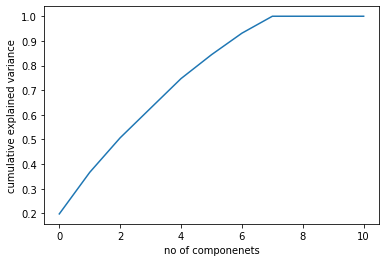

In [295]:
from sklearn.decomposition import PCA
pca=PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of componenets')
plt.ylabel('cumulative explained variance')

In [296]:
from sklearn.decomposition import PCA
pc=PCA(n_components=7)
x=pc.fit_transform(x)
var=pc.explained_variance_ratio_
print(var)

[0.19774273 0.16876007 0.14016547 0.12025262 0.12007904 0.09683779
 0.08741064]


### with 3 eigen values we would get about 75 percent of the explained variance ###

In [297]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,ParameterGrid,GridSearchCV
# the train_test_split method is designed to split our x any inot training set and test set
# giving four output. While splitting the x and y it shuffles the rows
# to get the same shuffling for everyone we provide the shuffling state as the value if 'random_state' parameter
# we also need to give the size of either the train_size or test_size, by default the ration is 75:25
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


### using hyperparameter technique to get the best hyperparameters ###

In [298]:
random_grid={'bootstrap':[True,False],
             'max_depth':[15,100,200,300,400,500],
             'max_features':['auto','sqrt'],
             'min_samples_leaf':[1,2,4],
             'min_samples_split':[2,5,10],
             'n_estimators':[130,200,300,400,500]
            }

In [299]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [15, 100, 200, 300, 400,
                                                      500],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [300]:
rf_random.best_params_
rf_random.best_score_
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=4, n_estimators=200)

In [301]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_leaf=4)
rfr.fit(x_train,y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=4, n_estimators=200)

In [302]:
y_pred= rfr.predict(x_test)
from sklearn.metrics import r2_score
print("test score",round(r2_score(y_test,y_pred),2))

test score 0.85


### after appling the pca the accuracy is about 85 percent because it has lost lot of information from the orginal dataset but the dimension has been reduced ###

### MODEL EVALUATION ###

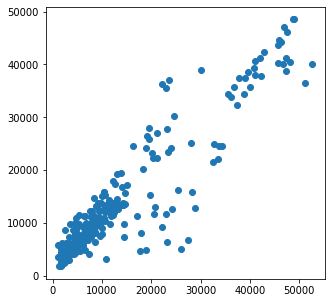

In [304]:
predictions=rfr.predict(x_test)
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions)

In [306]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 test_data:',round(r2_score(y_test,predictions),2))

MAE: 3164.5748182738803
MSE: 23522494.550308153
RMSE: 4849.999438176065
R2 test_data: 0.85


Text(0.5, 1.0, 'cross-validated predictio accuracy of charges')

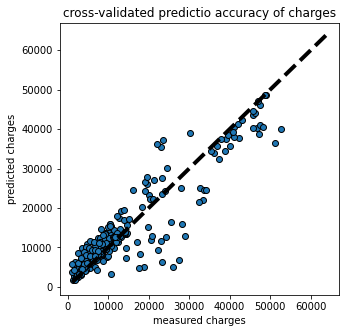

In [308]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions,edgecolors=(0,0,0))
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel("measured charges")
plt.ylabel("predicted charges")
plt.title("cross-validated predictio accuracy of charges")

### MULTIPLE LINEAR REGRESSION ###

In [319]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,ParameterGrid,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [320]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [321]:
y_pred=regressor.predict(x_test)

In [322]:
print("train score",regressor.score(x_train,y_train))
print("test score",regressor.score(x_test,y_test))

train score 0.736105705723292
test score 0.800369109478522


In [323]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 test_data:',round(r2_score(y_test,y_pred),2))

MAE: 3933.838068281005
MSE: 31767256.087015174
RMSE: 5636.244856907405
R2 test_data: 0.8


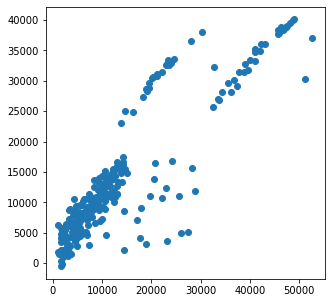

In [324]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)

Text(0.5, 1.0, 'cross-validated predictio accuracy of charges')

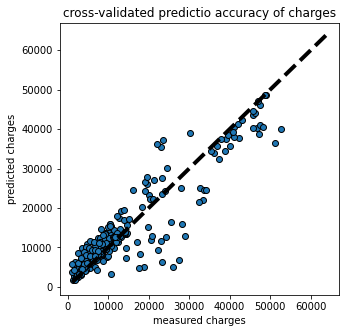

In [325]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions,edgecolors=(0,0,0))
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel("measured charges")
plt.ylabel("predicted charges")
plt.title("cross-validated predictio accuracy of charges")

### MULTIPLE LINEAR REGRESSION WITH PCA ###

In [347]:
from sklearn.decomposition import PCA
pc=PCA(n_components=7)
x=pc.fit_transform(x)
var=pc.explained_variance_ratio_
print(var)

[0.19774273 0.16876007 0.14016547 0.12025262 0.12007904 0.09683779
 0.08741064]


In [334]:
print(x)

[[ 8.81057055e-01  2.81759990e+00 -7.53173914e-01 ... -1.21037946e+00
  -1.74839720e+00 -1.27999716e-01]
 [ 8.21132486e-01 -1.30845864e+00  1.63114951e+00 ...  4.79823970e-01
  -1.45916453e+00  9.48288279e-01]
 [ 8.14089932e-01 -1.34196252e+00  1.61331106e+00 ...  2.40407400e-01
  -3.67568579e-02  1.96943633e+00]
 ...
 [-1.07826824e+00  7.53905323e-01  2.09189278e+00 ...  5.63097994e-01
  -1.77254408e+00  2.59676101e-01]
 [-1.63890056e+00  4.54770509e-01 -3.78900302e-01 ... -8.71913660e-01
  -1.85524172e+00 -2.30655437e-03]
 [ 7.54325391e-01  2.83206643e+00 -1.06794547e+00 ... -1.22064332e+00
   9.12616035e-01 -1.86076241e+00]]


In [348]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,ParameterGrid,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [349]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [350]:

y_pred=regressor.predict(x_test)


In [351]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 test_data:',round(r2_score(y_test,y_pred),2))

MAE: 3854.8591390271276
MSE: 32162626.800349526
RMSE: 5671.210347037882
R2 test_data: 0.8


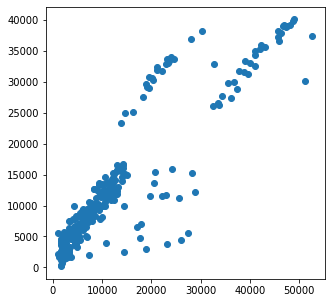

In [352]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)

Text(0.5, 1.0, 'cross-validated predictio accuracy of charges')

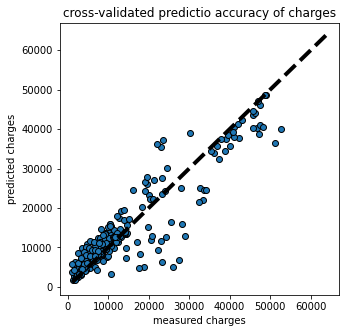

In [353]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions,edgecolors=(0,0,0))
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel("measured charges")
plt.ylabel("predicted charges")
plt.title("cross-validated predictio accuracy of charges")